In [1]:
#improting libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import  Sequential, Model
from tensorflow.keras.utils import to_categorical
from keras.backend import clear_session
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Activation, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# **CNN Model Scratch**

# **Load the data**

In [2]:
# Loading the CIFAR-10 dataset from Keras
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
# Printing the shapes of the datasets to inspect the dimensions
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


# **Data Visualization**

In [3]:
#title Default title text
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

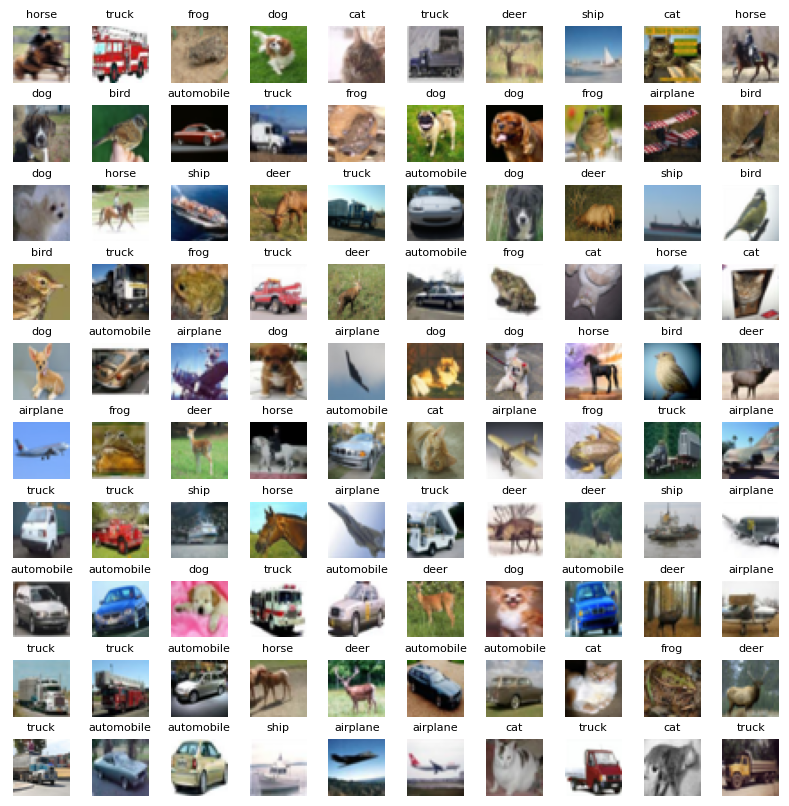

In [5]:
# Define grid size for plotting images
W_grid = 10  # Number of columns
L_grid = 10  # Number of rows

# Create a 10x10 grid for displaying images
fig, axes = plt.subplots(L_grid, W_grid, figsize=(10, 10))

# Flatten the grid of axes for easy indexing
axes = axes.ravel()

# Get the total number of training images
n_train = len(x_train)

# Loop to display 100 random images
for i in np.arange(0, W_grid * L_grid):
    # Select a random image from the training set
    index = np.random.randint(0, n_train)

    # Show the image in the subplot
    axes[i].imshow(x_train[index])

    # Get the label for the image and set it as the title
    label_index = y_train[index][0]  # Get the label index
    axes[i].set_title(class_names[label_index], fontsize=8)

    # Hide the axis ticks
    axes[i].axis('off')

# Adjust spacing between images
plt.subplots_adjust(hspace=0.4)



# **Data Preprocessing**

In [4]:
# Model and data parameters
num_classes = 10  # Number of output classes (CIFAR-10 has 10 classes)
input_shape = (32, 32, 3)  # Shape of each image (32x32 pixels, 3 color channels)

In [5]:
# Scale pixel values of images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0  # Normalize training images
x_test = x_test.astype('float32') / 255.0    # Normalize test images

In [8]:
# Print the shape of the training and test datasets
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")  # Number of training samples
print(x_test.shape[0], "test samples")    # Number of test samples

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# Convert the class labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)  # One-hot encode training labels
y_test = to_categorical(y_test, num_classes)    # One-hot encode test labels

# **Model Building CNN**

# **CNN DEEP MODEL**

In [10]:
# CNN Model 2: A deeper CNN with more layers for better feature extraction
modeldeep = Sequential([
    Input(shape=input_shape),  # Input layer with the shape of CIFAR-10 images (32x32x3)

    # First Convolutional Block
    Conv2D(32, kernel_size=(5, 5), activation="relu", padding="same"),  # Convolutional layer with 32 filters
    BatchNormalization(),  # Normalizing to stabilize learning
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),  # Another convolution layer
    MaxPooling2D(pool_size=(2, 2)),  # Downsampling feature maps
    Dropout(0.2),  # Dropout to prevent overfitting

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Third Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    # Fourth Convolutional Block
    Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Fifth Convolutional Block (New layer for deeper feature extraction)
    Conv2D(512, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(512, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.45),

    # Global Average Pooling instead of Flatten to reduce parameters
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(1024, activation="relu"),  # First fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(512, activation="relu"),  # Second fully connected layer
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for 10 classes (CIFAR-10)
])

# Display model architecture summary
modeldeep.summary()

# Compile the model using categorical cross-entropy loss and Adam optimizer
modeldeep.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Early stopping callback to stop training if validation loss stops improving for 10 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with training data, 10% validation split, batch size 128, and early stopping
modeldeep_history = modeldeep.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1, callbacks=[early_stop])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,772,970 (22.02 MB)

 Trainable params: 5,770,986 (22.01 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.1917 - loss: 2.2241 - val_accuracy: 0.1676 - val_loss: 2.4261
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3853 - loss: 1.6088 - val_accuracy: 0.3886 - val_loss: 1.7016
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5047 - loss: 1.3614 - val_accuracy: 0.5862 - val_loss: 1.2004
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5890 - loss: 1.1864 - val_accuracy: 0.6460 - val_loss: 1.0323
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6459 - loss: 1.0510 - val_accuracy: 0.6094 - val_loss: 1.1438
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6814 - loss: 0.9590 - val_accuracy: 0.6588 - val_loss: 1.0526
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7048 - loss: 0.8913 - val_accuracy: 0.6014 - val_loss: 1.2383
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7295 - loss: 0.8267 -

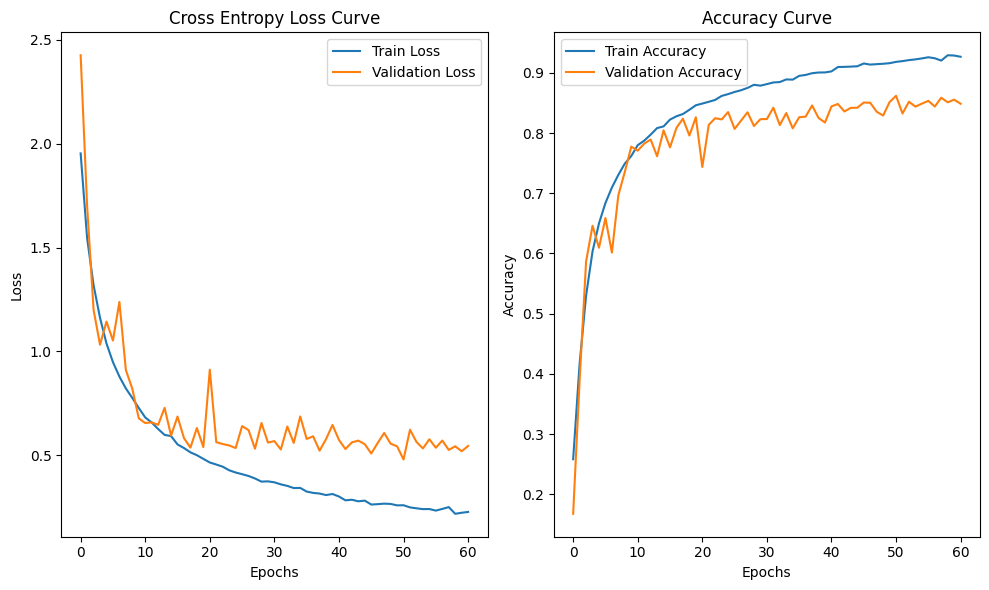

Model 2 Test loss: 53.30215096473694
Model 2 Test accuracy: 84.7000002861023


In [11]:
# Evaluate the CNN deep model

# Plot Loss Curve
plt.figure(figsize=(10, 6))  # Set figure size for better clarity

# Subplot 1: Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(modeldeep_history.history['loss'], label='Train Loss')  # Training loss
plt.plot(modeldeep_history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Subplot 2: Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(modeldeep_history.history['accuracy'], label='Train Accuracy')  # Training accuracy
plt.plot(modeldeep_history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Evaluate the trained model on the test set
score_deep = modeldeep.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print("Model 2 Test loss:", score_deep[0] * 100)  # Convert to percentage
print("Model 2 Test accuracy:", score_deep[1] * 100)  # Convert to percentage


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.92      0.94      0.93      1000
           2       0.74      0.83      0.78      1000
           3       0.71      0.67      0.69      1000
           4       0.83      0.81      0.82      1000
           5       0.79      0.78      0.78      1000
           6       0.86      0.89      0.88      1000
           7       0.93      0.86      0.89      1000
           8       0.93      0.91      0.92      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



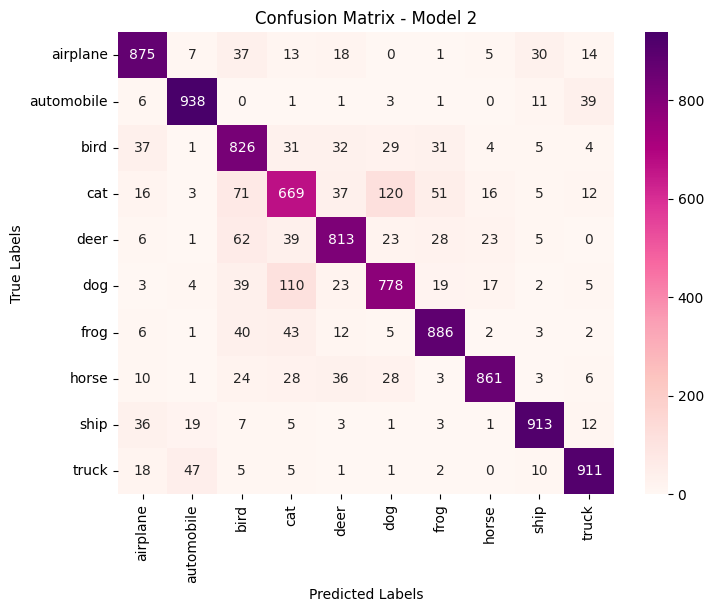

In [12]:
# Generate predictions for the deep CNN model on the test set
y_pred2 = np.argmax(modeldeep.predict(x_test), axis=1)  # Get predicted class indices

# Extract true labels from one-hot encoded format
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class indices

# Print the classification report
print("Model 2 Classification Report:")
print(classification_report(y_true, y_pred2))  # Precision, recall, f1-score, and support for each class

# Generate the confusion matrix
cm2 = confusion_matrix(y_true, y_pred2)  # Compare true labels vs. predicted labels

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm2, annot=True, fmt="d", cmap="RdPu", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Model 2")  # Title of the plot
plt.xlabel("Predicted Labels")  # X-axis label
plt.ylabel("True Labels")  # Y-axis label
plt.show()  # Display the confusion matrix

# **VGG Model**

In [13]:
# VGG Model
vgg_model = Sequential([
    Input(shape=input_shape),

    # First Convolutional Block
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth Convolutional Block
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fifth Convolutional Block
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(4096, activation="relu"),
    Dropout(0.5),  # Dropout for better generalization
    Dense(4096, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])
# Model Summary
vgg_model.summary()

# Compile the model
vgg_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Train the model with Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,   # Rotate images randomly by 15 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    horizontal_flip=True  # Flip images horizontally
)

# Fit the generator to training data
datagen.fit(x_train)

# Train the VGG model with EarlyStopping
history_vgg = vgg_model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,8

 Total params: 28,340,298 (108.11 MB)

 Trainable params: 28,334,410 (108.09 MB)

 Non-trainable params: 5,888 (23.00 KB)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.3810 - loss: 1.7418 - val_accuracy: 0.5440 - val_loss: 1.2888
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.6379 - loss: 1.0176 - val_accuracy: 0.6396 - val_loss: 1.0505
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7406 - loss: 0.7498 - val_accuracy: 0.7012 - val_loss: 0.8720
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8105 - loss: 0.5535 - val_accuracy: 0.7410 - val_loss: 0.7664
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8634 - loss: 0.3970 - val_accuracy: 0.7468 - val_loss: 0.7716
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8941 - loss: 0.3060 - val_accuracy: 0.7262 - val_loss: 0.9336
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9121 - loss: 0.2576 - val_accuracy: 0.7456 - val_loss: 0.8732
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.9474 - loss: 0.1593 - 

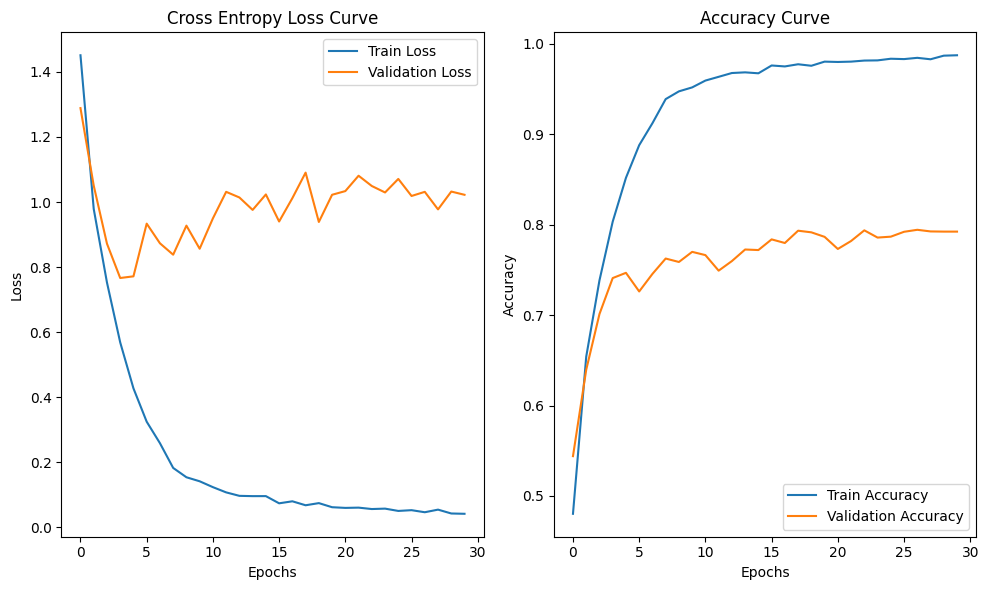

VGG Model Test loss: 107.24936723709106
VGG Model Test accuracy: 78.50000262260437


In [14]:
# Evaluate VGG model

# Loss curve
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()  # Ensures that the subplots do not overlap
plt.show()

score_vgg = vgg_model.evaluate(x_test, y_test, verbose=0)
print("VGG Model Test loss:", score_vgg[0] * 100)
print("VGG Model Test accuracy:", score_vgg[1] * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
VGG Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.86      0.91      0.89      1000
           2       0.75      0.66      0.70      1000
           3       0.64      0.56      0.60      1000
           4       0.78      0.74      0.76      1000
           5       0.65      0.76      0.70      1000
           6       0.87      0.81      0.83      1000
           7       0.81      0.84      0.83      1000
           8       0.80      0.91      0.85      1000
           9       0.88      0.85      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



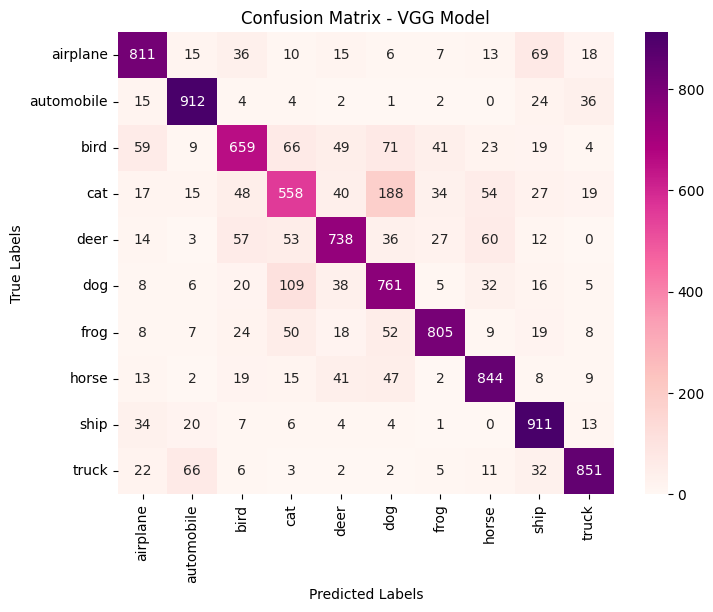

In [15]:
# Generate predictions for VGG model
y_pred_vgg = np.argmax(vgg_model.predict(x_test), axis=1)

# Classification Report for VGG model
y_true = np.argmax(y_test, axis=1)
print("VGG Model Classification Report:")
print(classification_report(y_true, y_pred_vgg))

# Confusion Matrix for VGG model
cm_vgg = confusion_matrix(y_true, y_pred_vgg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg, annot=True, fmt="d", cmap="RdPu", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - VGG Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#**Compare between the models**

In [16]:
# Collect the evaluation results for each model
model_results = {
    "Deep CNN": modeldeep.evaluate(x_test, y_test, verbose=0),
    "VGG": vgg_model.evaluate(x_test, y_test, verbose=0),
}

In [19]:
# Collect the evaluation results for each model
import pandas as pd # Import pandas and assign it to the alias "pd"
model_results = {
    "Deep CNN": modeldeep.evaluate(x_test, y_test, verbose=0),
    "VGG": vgg_model.evaluate(x_test, y_test, verbose=0),
}

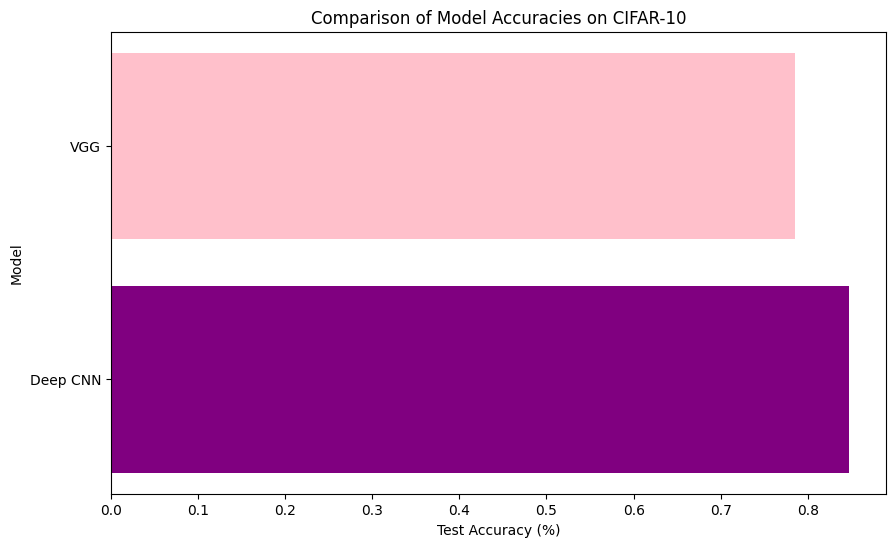

In [21]:
# Create a pandas DataFrame from the model_results dictionary
df_results = pd.DataFrame.from_dict(model_results, orient='index', columns=['Test Loss', 'Test Accuracy'])
df_results['Model'] = df_results.index  # Add a 'Model' column using the index
df_results = df_results.reset_index(drop=True)  # Reset the index

# Horizontal Bar Plot for Test Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.barh(df_results['Model'], df_results['Test Accuracy'], color=['purple', 'pink'])
plt.xlabel('Test Accuracy (%)')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies on CIFAR-10')
plt.show()


In [24]:
# Find the best model based on the highest accuracy
best_model_row = df_results.loc[df_results['Test Accuracy'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Test Accuracy']

# Print the best model
print(f"The best model is: {best_model_name} with accuracy: {best_model_accuracy:.2f}%")

# Save the best model
if best_model_name == 'Deep CNN':
    modeldeep.save('deep_cnn_model.h5')
elif best_model_name == 'VGG':
    vgg_model.save('vgg_model.h5')

The best model is: Deep CNN with accuracy: 0.85%
